In [218]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
import datetime

In [219]:
df = pd.read_csv('conversion.csv')

In [220]:
df.columns = df.columns.str.lower()

In [221]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [222]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

Сколько уникальных рекламных кампаний было проведено? 

In [223]:
df.xyz_campaign_id.nunique()

3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [224]:
dfad = df.groupby('fb_campaign_id', as_index=False).agg({'impressions':'sum'}).rename(columns={'impressions':'sm'})

In [225]:
dfad['sm'] = np.log(dfad['sm'])

In [226]:
dfad.head()

,fb_campaign_id,sm
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473


<AxesSubplot:xlabel='sm', ylabel='Count'>

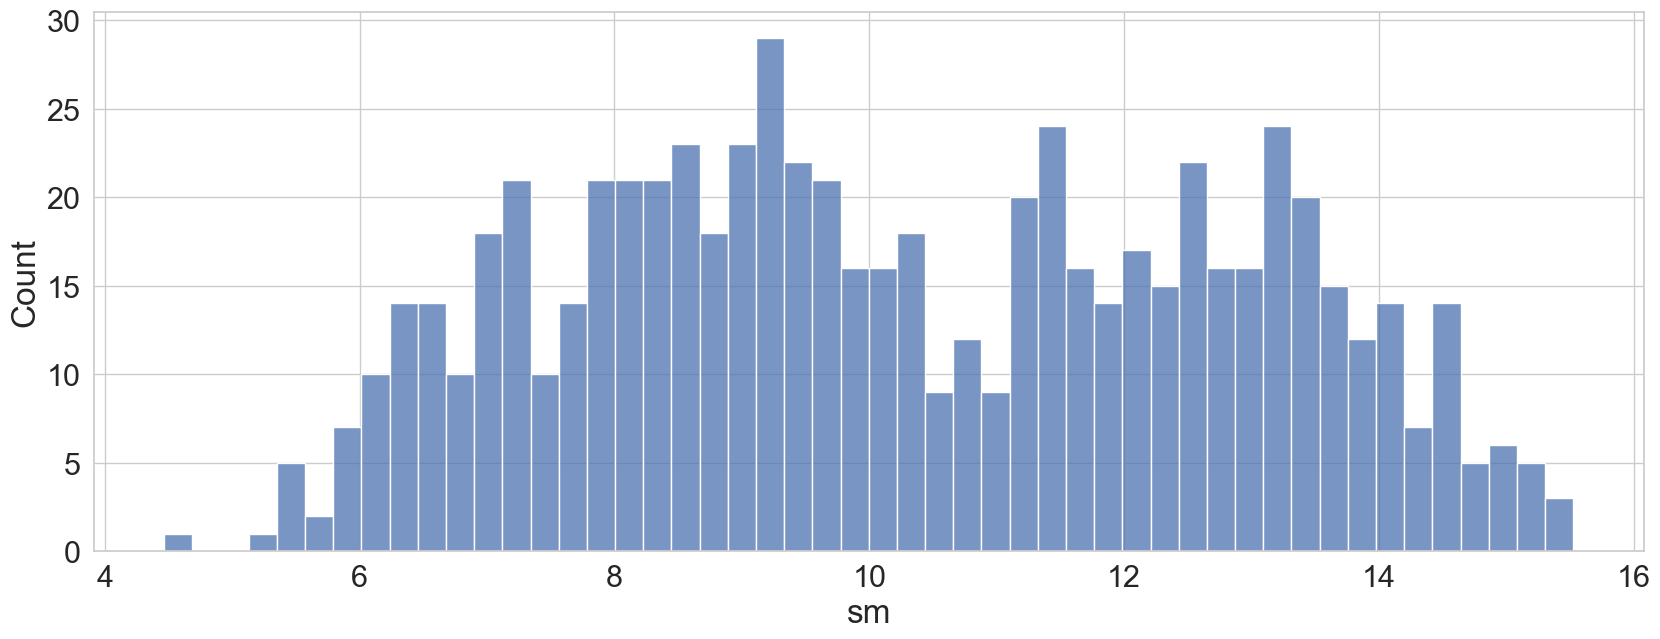

In [227]:
sns.set(
font_scale = 2 ,
style = 'whitegrid' ,
rc = {'figure.figsize' : (20,7)})
sns.histplot(x='sm', data=dfad, bins=50)

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов. Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [228]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [229]:
df['ctr'] = df.clicks/df.impressions

In [230]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [231]:
df[df.ctr==df.ctr.max()]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


Визуализируйте CTR с разбивкой по номеру рекламной кампании

<AxesSubplot:xlabel='ctr', ylabel='Count'>

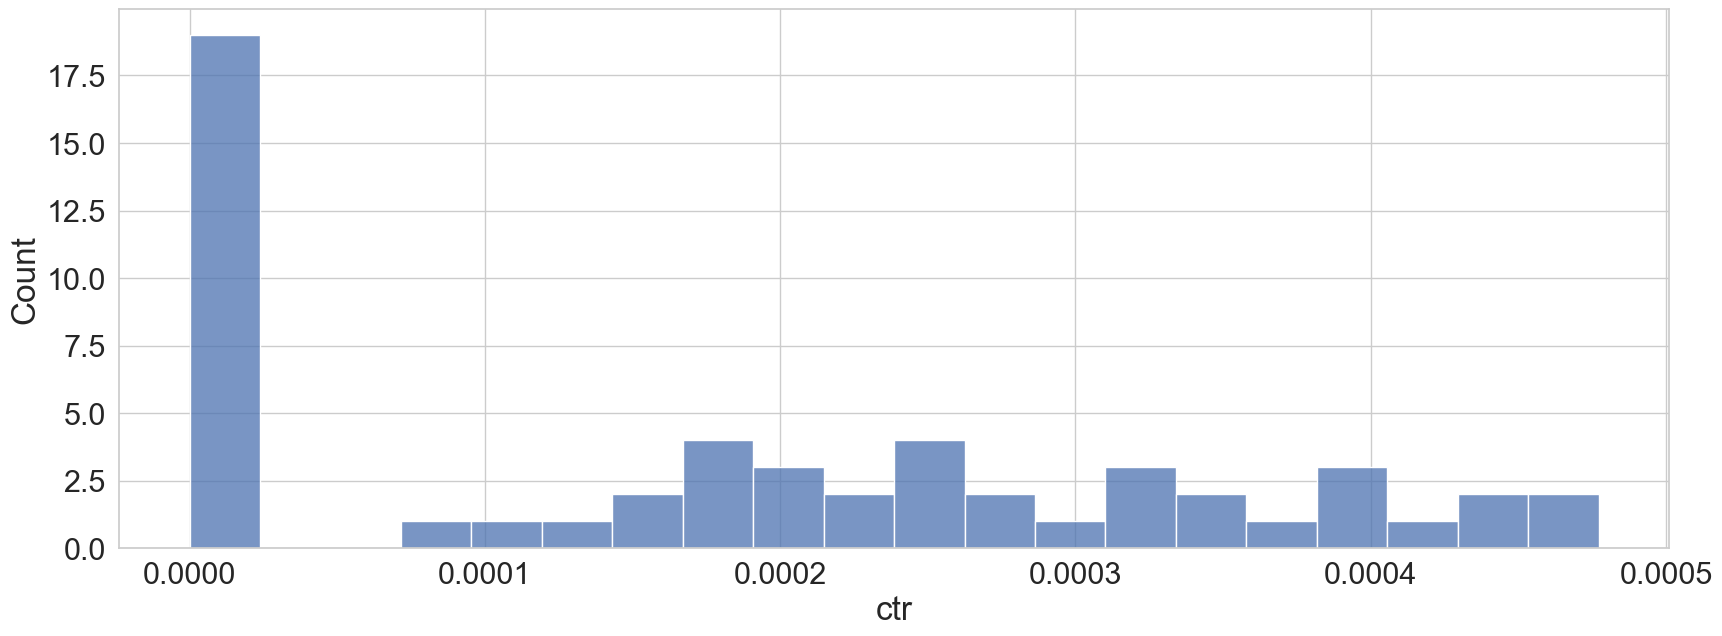

In [232]:
sns.histplot(df[df.xyz_campaign_id==916]['ctr'], bins=20)

In [233]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

In [234]:
df['cpc'] = df.spent/df.clicks

In [235]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [236]:
IQR = stats.iqr(df['cpc'],nan_policy='omit', interpolation = 'midpoint' )

In [237]:
round(IQR,2)

0.25

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [238]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [239]:
df['cn_rt'] = (df.approved_conversion/df.clicks).mul(100)

In [240]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc,cn_rt
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.793651
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,1.481481


In [241]:
round(df[df.ad_id == 1121814]['cn_rt'],2)

860    3.09
Name: cn_rt, dtype: float64

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

In [242]:
M = df.query("gender == 'M'")
F = df.query("gender == 'F'")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpc', ylabel='Density'>

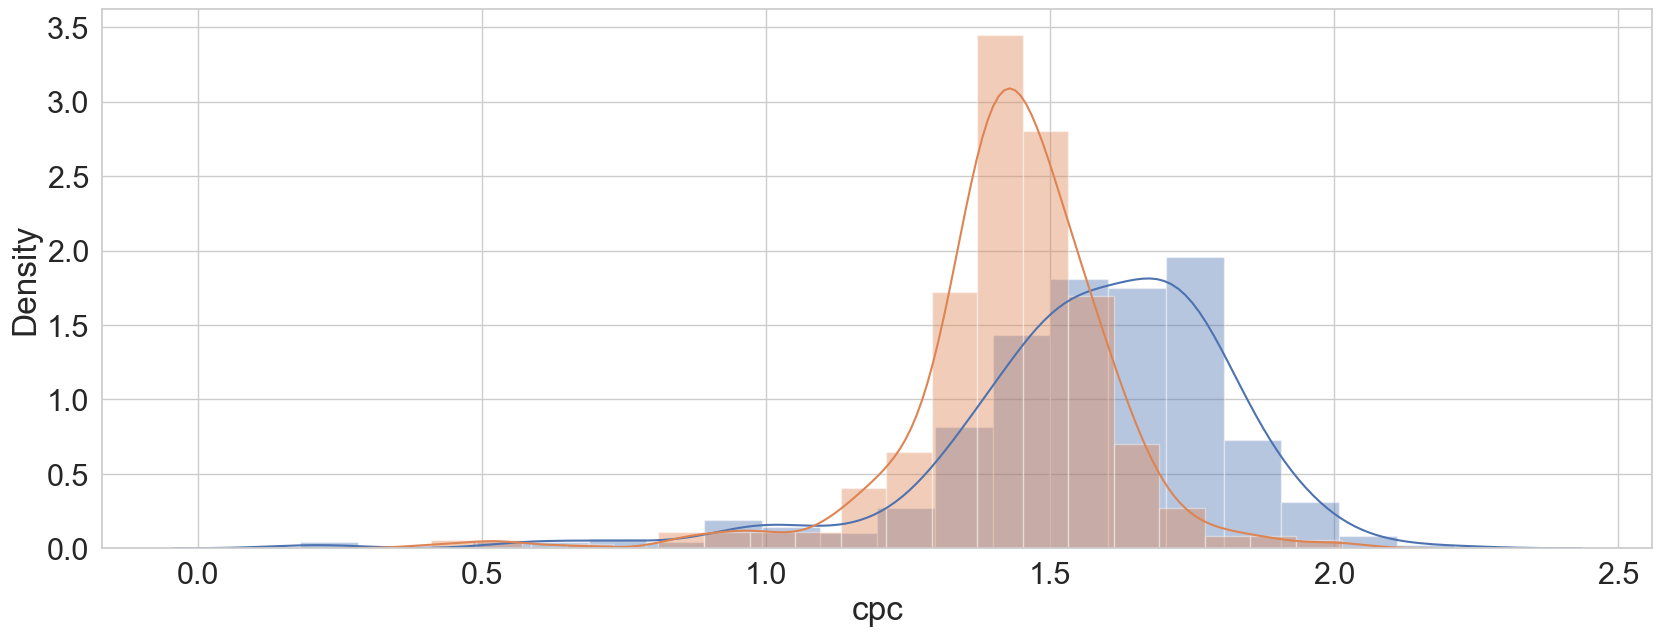

In [243]:
sns.distplot(M["cpc"],bins = 20)
sns.distplot(F["cpc"],bins = 20)
